### Solid Liquid Equilibrium (SLE) Case 1: Ideal Liquid + Ideal Solid

The fugacity matching condition for solid liquid equlibrium is given by:

$$
x_{i}\gamma_{i} = z_{i}\Gamma_{i}\psi_{i}\qquad{i=1,2,\dots,\mathcal{M}}
$$

where $x_{i}$ denotes the mol fraction of component $i$ in the liquid, $\gamma_{i}$ denotes the liquid phase activity coefficient, $z_{i}$ denotes the mol fraction of component $i$ in the solid, $\Gamma_{i}$ denotes the activity coefficient for component $i$ in the solid and $\psi_{i}$ denotes the temperature dependence of ratio of reference fugacities. The quantity $\psi_{i}$ is given by:

$$
\ln\psi_{i} = -\frac{\Delta{H_{i}^{ls}}}{R}\left(\frac{1}{T} - \frac{1}{T_{m_{i}}}\right)
$$

where $\Delta{H_{i}^{ls}}$ denotes the heat of fusion for pure component $i$, $T$ denotes the system temperature, $R$ denotes the ideal gas constant, and $T_{m_{i}}$ denotes the melting temperature for pure component $i$. 

#### Ideal Liquid + Ideal Solid

When we have ideal liquid, and an ideal solid, the activity coefficients for component $i$ in the liquid ($\gamma_{i}$) and solid ($\Gamma_{i}$) are unity. Thus, our design equation reduces to:

$$
x_{i}=z_{i}\psi_{i}\qquad{i=1,2,\dots,\mathcal{M}}
$$

Given the melting temperature, and the heat of fusion for each component, we can construct a Txz phase diagram for the different phases our mixture can exist in (at least in the binary case). Let's check this out with a binary ($\mathcal{M}$ = 2) example. We are going to pull some data from a recent 2019 study [Luo et. al., Ind. Eng. Chem. Res. 2019, 58, 10018−10030](https://pubs.acs.org/doi/full/10.1021/acs.iecr.9b00921). Let's simulate a adipic acid(1)/cornellium(2) mixture.

In [52]:
# include -
include("Include.jl")

 Activating environment at `~/.julia/environments/v1.5/Project.toml`


compute_composition (generic function with 1 method)

In [81]:
# Setup data -
data_array = [
    34852.0 425.5  ; # adipic acid DH fusion (J/mol) and Tm (K) from Luo et al (component 1)
    17300.0 296.0  ; # DH fusion (J/mol) and Tm (K) for Cornellium (component 2)
]

2×2 Array{Float64,2}:
 34852.0  425.5
 17300.0  296.0

In [82]:
# setup the temperature range which we are going to simulate -
T_vector = range(data_array[1,2],stop=data_array[2,2],length=100) |> collect;

# compute the psi_array -
psi_array = compute_psi(T_vector,data_array);

# compute the composition array -
# rows = T values
# col 1 = x1
# col 2 = x2
composition_array = compute_composition(psi_array);

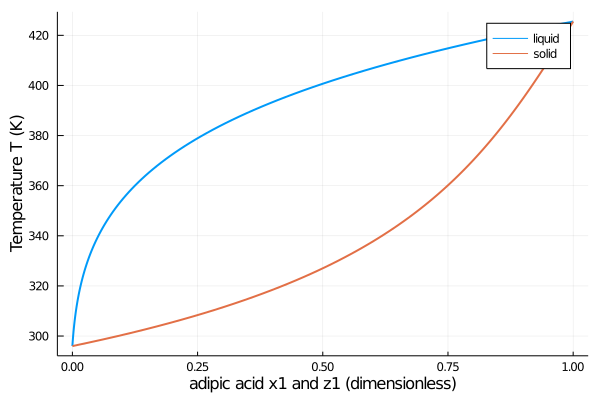

In [83]:
# make a plot -
plot(composition_array[:,1],T_vector, label="liquid", lw=2)
plot!(composition_array[:,2],T_vector, label="solid", lw=2)
xlabel!("adipic acid x1 and z1 (dimensionless)")
ylabel!("Temperature T (K)")